In [28]:
import pandas as pd
import numpy as np
from scipy import integrate
from scipy import linalg
import matplotlib.pyplot as plt

### Pandas

Для некоторых заданий, возможно, придется обратиться к документации: https://pandas.pydata.org/docs/



* Скачайте любой табличный датасет (или создайте тестовый пример самостоятельно), например, с https://www.kaggle.com/datasets

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Загрузите данные и проанализируйте их (используя функции .info и .describe)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv').set_index('Unnamed: 0')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


* Выведите отдельно интересующую вас колонку и столбец

In [9]:
df['salary']

Unnamed: 0
0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

In [10]:
df.job_title

Unnamed: 0
0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: object

In [11]:
df.iloc[3]

work_year                             2020
experience_level                        MI
employment_type                         FT
job_title             Product Data Analyst
salary                               20000
salary_currency                        USD
salary_in_usd                        20000
employee_residence                      HN
remote_ratio                             0
company_location                        HN
company_size                             S
Name: 3, dtype: object

In [12]:
df[10:15]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L


### Numpy

Для некоторых заданий, возможно, придется обратиться к документации: https://numpy.org


* Создайте вектор (одномерный массив) размера 10, заполненный нулями

In [14]:
vector = np.zeros(10)
vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* Создайте вектор размера 10, заполненный числом 5.8

In [15]:
vector = 5.8 * np.ones(10)
vector

array([5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8])

* Создйте массив 3x3x3 со случайными значениями

In [17]:
array = np.random.random([3, 3, 3])
array

array([[[0.66452727, 0.25356327, 0.6849004 ],
        [0.85899896, 0.40109447, 0.10260639],
        [0.46214964, 0.64664128, 0.26267609]],

       [[0.15371765, 0.69569007, 0.66515908],
        [0.36194786, 0.94010279, 0.58519247],
        [0.97036537, 0.64649608, 0.00699154]],

       [[0.90354612, 0.41318897, 0.60749506],
        [0.68679257, 0.76449343, 0.38175309],
        [0.70142477, 0.04724661, 0.18815714]]])

* Создайте 8x8 матрицу и заполнить её в шахматном порядке

In [18]:
matrix = np.zeros((8,8),dtype=int)
matrix[1::2,::2] = 1
matrix[::2,1::2] = 1
matrix

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

* Cоздайте матрицу 4 на 4 и заполните ее произвольными числами (понадобиться в дальйнешем)

In [19]:
matrix = np.random.randint(1, 10, [4, 4])
matrix

array([[2, 2, 1, 9],
       [7, 8, 1, 6],
       [2, 9, 6, 4],
       [1, 9, 4, 7]])

### Scipy


* Возьмите интеграл $\int_{-3}^{10} sin(x)* x^{2} \,dx $

In [21]:
func = lambda x: np.sin(x) * x**2
integrate.quad(func, -3, 10)

(63.57192010714263, 2.177803784883395e-12)

* Найдите определитель, обратную матрицу и собственные значения к матрице из последнего пункта раздела Numpy

In [24]:
linalg.det(matrix)

1138.0

In [25]:
linalg.inv(matrix)

array([[ 0.06414763,  0.12038664,  0.15026362, -0.271529  ],
       [-0.16168717,  0.05272408, -0.14586995,  0.24604569],
       [ 0.14323374, -0.10105448,  0.3629174 , -0.30492091],
       [ 0.1168717 , -0.02724077, -0.04130053,  0.03954306]])

In [26]:
linalg.eig(matrix)

(array([20.14754937+0.j        ,  0.30398943+5.00730558j,
         0.30398943-5.00730558j,  2.24447176+0.j        ]),
 array([[ 3.60645767e-01+0.j        ,  6.31963541e-01+0.j        ,
          6.31963541e-01-0.j        , -2.16131510e-01+0.j        ],
        [ 5.24284104e-01+0.j        , -1.84825837e-01-0.49415679j,
         -1.84825837e-01+0.49415679j,  4.16643869e-01+0.j        ],
        [ 5.40202705e-01+0.j        , -1.76457119e-01+0.32717298j,
         -1.76457119e-01-0.32717298j, -8.83003361e-01+0.j        ],
        [ 5.50673994e-01+0.j        , -5.84120058e-02+0.42506391j,
         -5.84120058e-02-0.42506391j, -3.46936516e-04+0.j        ]]))

### Matplotlib/Seaborn

* Нарисуйте график sin(x), подпишите оси, добавьте сетку

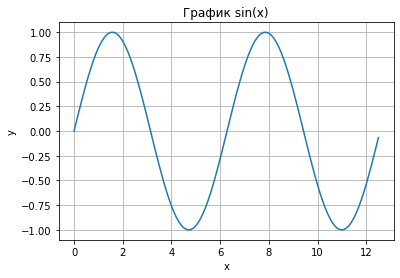

In [29]:
x = np.arange(0, 4*np.pi, 0.1)
y = np.sin(x)

fig = plt.figure()
plt.plot(x, y)
plt.grid()
plt.title('График sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* Нарисуйте график sin(x) и cos(x) на одном subplot'е и на разных, задайте цвета, которые вам больше нравятся

In [30]:
y_1 = np.cos(x)

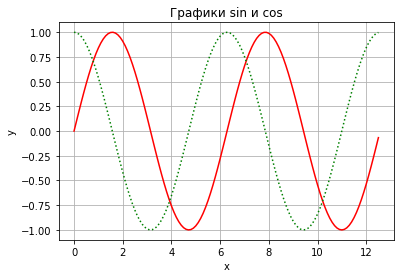

In [33]:
fig_1 = plt.figure()
plt.plot(x, y, '-r', x, y_1, ':g')
plt.grid()
plt.title('Графики sin и cos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

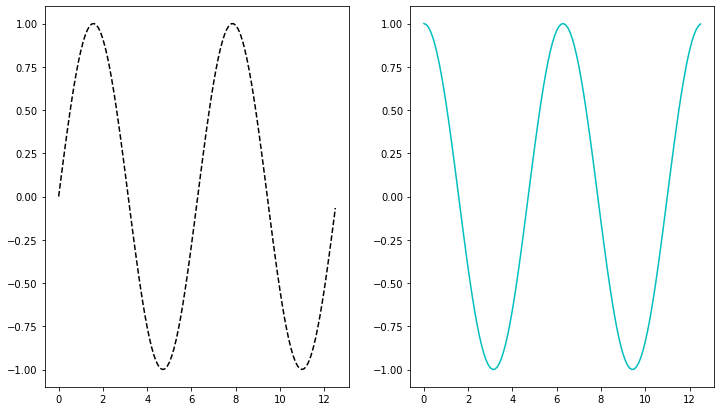

In [43]:
plt.figure(figsize = (12, 7))

plt.subplot(1, 2, 1)
plt.plot(x, y, '--k')

plt.subplot(1, 2, 2)
plt.plot(x, y_1, '-c')